##Gerardo Rivas Álvarez

### Ejercicio 1: El fractal de Newton

(Ejercicio tomado de un curso de David P. Sanders)

Este ejercicio tiene dos objetivos. Que implementen el método de Newton para una variable (real o compleja) para buscar ceros de una función $f(x)$ dando *también* su derivada, y que construyan un fractal usándolo.

Recordemos primero qué es el método de Newton (o Newton-Raphson) en una variable, para encontrar las raíces (ceros) de una función no lineal $f(x)$. El método de Newton es un método iterativo definido por:

$$
x_{n+1}=x_n−\frac{f(x_n)}{f′(x_n)},
$$

a partir de una *condición inicial* $x_0$ dada. (Cualquier libro de cálculo 1 es buena referencia para la construcción.) Lo importante es que $x_{n+1}$, se construye a partir del anterior, usando la función $f(x)$ (cuyas raíces queremos encontrar) y *también* su derivada $f'(x)$. 

El *teorema* dice que si $x_0$ está suficientemente cerca de $x^*$, donde $f(x^*)=0$, entonces $x_n \to x^*$ cuando $n\to\infty$.

1. Implementen una función para encontrar las raíces de una función arbitraria $f(x)$. En particular, consideren $f(x) = x^2 - 2$. (Para escribir $f'(x)$ con caracteres Unicode, simplemente escriba `f\prime<TAB>`.) *HINT:* Como a priori no sabemos si la condición inicial conviene o no, vale la pena poner un tope superior al número de iteraciones del método de Newton.

2. Usa el método de Newton para encontrar las raíces cúbicas de 1, o sea, $g(z) = z^3-1$. Empezando con una malla de condiciones iniciales $z_0$ (en el plano complejo), determina a donde converge cada condición inicial. Guarden los resultados en una matriz: $N_{i,j} = z_{end}(z_0)$, donde $(i,j)$ identifican el punto en la malla. (Algo importante es que en Julia las matrices se almacenan corriendo sobre los renglones, es decir, primero se almacena la primer columna, luego la segunda, etc. Saber esto puede hacer que logren hacer correr las cosas de manera *eficiente*.)

3. Grafiquen los resultados usando `imshow`, `pcolor` y/o `pcolormesh` definidos en `PyPlot`; lean la documentación para ver cómo usar la instrucción que ustedes elijan.

4. ¿Qué modificaciones puedes hacer para hacer ampliaciones? Haz un par de ejemplos. ¿Tiene sentido el uso de la palbra "fractal"?

(Pueden experimentar también con otras funciones complejas, otros polinomios, o `sin`.)

---

##Solución.

Para resolver el 1. se me ocurre usar un ciclo para generar la sucesión $x_n$ que converge a la raíz. En el programa primero se define la función y su derivada. Después se da la condición inicial. y se hace el ciclo con tope de $n=100$. Por último se imprime el resultado.

In [1]:
function NewtonRaphson(f,f′,x0)
    x=x0
    for i in 1:100
        x = x - f(x)/f′(x)
    end
    return x
end

NewtonRaphson (generic function with 1 method)

Ahora se probará la función NewtonRaphson con una función.

In [12]:
f(x) = x^2 -2
f′(x) = 2*x
NewtonRaphson(f,f′,1)

1.414213562373095

A continuación se define la función fractal, donde se divide el plano complejo en una malla de dim x dim puntos y se aplica la función NewtonRapshon a cada punto de la malla y se guarda el valor en una matriz. Para hacer apliaciones se colocó el argumento `inter`, que define el cuadrado $(-inter, inter) \times (-inter, inter)$ donde se hará la malla. 

In [13]:
function fractal(f,f′, dim, inter)#dim = dimensión de la matriz, inter da el intervalo (-inter, inter)
    N = Array(Complex{Float64},dim+1,dim+1)
    for x in 1:dim + 1 
        for y in 1: dim +1
            
            #El intervalo (-inter, inter) se hace una partición de dim puntos.
            # z = x +iy. x y 'y' son los puntos de la malla. 
            
            z = (-inter + 2*inter*(x-1)/dim) + (-inter + 2*inter*(y-1)/dim)*im
            
            N[x,y] = NewtonRaphson(f,f′,z)
        
        end
    end
    return N
end
            

fractal (generic function with 1 method)

In [4]:
f(x) = x^2 -2
f′(x) = 2*x

fractal(h,h′,200,1)

201x201 Array{Complex{Float64},2}:
 -0.860657-1.00123im   -0.860657-1.00123im   …  -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im   …  -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im   …  -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
 -0.860657-1.00123im   -0.860657-1.00123im      -0.860657+1.00123im 
          ⋮                                  ⋱           ⋮          

In [6]:
using PyPlot

g(z) = z^3 -1
g′(z)=3*z^2
#imshow tiene como argumento una matriz, y por cada elemento de la matriz igual a otro elemento  
imshow(imag(fractal(g,g′,400,10)))


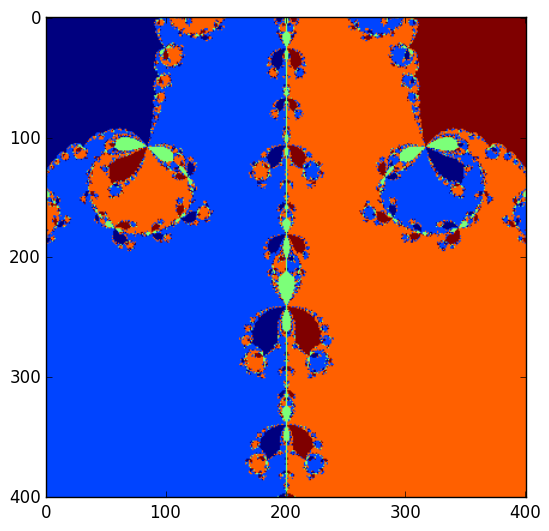

PyObject <matplotlib.image.AxesImage object at 0x7f4971f76490>

In [28]:
h(x) = x^6-9x^4-9x^3-6x^2+4x-9
h′(x) = 6*x^5 - 36*x^3 - 27*x^2 - 12*x +4 
imshow(imag(fractal(h,h′,400,1)))

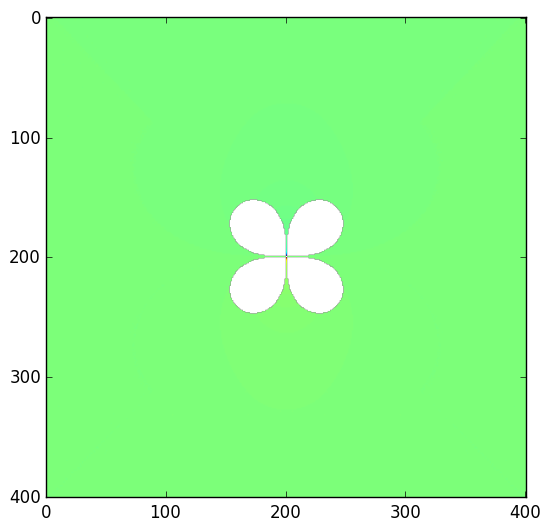

PyObject <matplotlib.image.AxesImage object at 0x7f869f58fc90>

In [10]:
f(x) = sin(x^2-1)
f′(x) = 2*x*cos(x^2 -1)
N = fractal(f,f′, 400, 0.1)
imshow(real(N))

Las gráficas que se obtuvieron son representaciones geométricas discretas de los fractales, pero también lo es cualquier gráfica que se haga en computadora. Así que hablar de estos "fractales" tiene tando sentido como hablar de, por decir algo, la gráfica de `sin(x)`.

### Ejercicio 2: Operadores como funciones

- ¿Qué pasa si sumas dos cadenas (*strings*)?

- ¿Qué pasa si multiplicas dos cadenas (*strings*)?

- Contruye una función *específica* que sume dos cadenas

---

Veamos qué pasa si se suman dos cadenas.

In [1]:
cadena1 = "Hola"
cadena2 = "Mundo"
cadena = cadena1 + cadena2 

LoadError: LoadError: MethodError: `+` has no method matching +(::ASCIIString, ::ASCIIString)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any)
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)

while loading In[1], in expression starting on line 3

 in split at ./deprecated.jl:31
 in pyerr_content at /home/windie/.julia/v0.4/IJulia/src/execute_request.jl:62
 in execute_request_0x535c5df2 at /home/windie/.julia/v0.4/IJulia/src/execute_request.jl:228
 in eventloop at /home/windie/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at ./task.jl:344


Observamos que no regresa nada, más que un error de método de la función +. Ahora veamos que devuelve si hacemos el producto de cadenas.

In [2]:
cadena = cadena1*cadena2

"HolaMundo"

Con el producto de dos cadenas julia regresa una cadena con las dos cadenas, una escrita inmediatamente después de la primera.

In [6]:
import Base: +
#Se define el método de la suma para cadenas.
+(a::String,b::String) = a*" "*b #Se unen las dos cadenas con un espacio entre ellas.

+ (generic function with 142 methods)

Ahora vamos a probar si jala el nuevo método de la función suma para cadenas de texto.

In [5]:
cadena = cadena1 + cadena2

"Hola Mundo"

### Ejercicio 3: Diferenciación automática

En clase vimos cómo definir estructuras "tipo" (*types*), y los conceptos básicos atrás de los `Duales` que sirven para implementar la diferenciación automática. 

El objetido de este ejercicio es que construyan un *módulo* (*llamado AutDiff en un archivo llamado AutDiff.jl*) que permita calcular primeras derivadas de manera más exacta que permita la computadora, o sea, que el error sea del orden del *epsilon* local de la máquina.

1. Define el tipo (estructura) `Dual` (**con exactamente ese nombre**) que contenga dos campos, el valor de la función y el valor de su derivada. Haz que *ambos* campos tengan el mismo tipo de valor, y que ambos *tengan* que ser un subtipo de `Real`.

- Define métodos para que el dual de un número (sólo *un* número) sea lo que uno espera, y una función `dual_var(x0)` que retorne un dual que represente a la variable *independiente* en `x0`.

- Define métodos que sumen, resten, multipliquen y dividan duales, y números con duales. Incluye los casos (para duales) en que los operadores `+` y `-` actúan sólo sobre un `Dual`.

- Incluye extensiones de las funciones elementales más usuales (`^`, `exp`, `log`, `sin`, `cos`, `sqrt`, etc).

- Muestra que el error numérico de lo que has hecho es esencialmente el epsilon de la máquina. Para esto define alguna función $f(x)$ y aplícala sobre `x = dual_var(x0)`, y muestra que el error es del orden del epsilon de la máquina al rededor del valor verdadero de la derivada.

- Extiende la función para el método de Newton para que funcione sólo dando la función, y que la derivada la obtenga usando las herramientas del módulo.


---

In [1]:
#AutDiff.jl
#module AutDiff.

#Se define el vector dual.
type Dual{T<:Number} 
    f::T
    df::T
end

#Se promueve el par ordenado (a,b) para que tengan el mismo tipo.
Dual(a,b) = Dual(promote(a,b)...)

#Función que convierte de real a Dual.
dual_num(x::Real) = Dual(x,0)

#Función que devuelve el Dual de la identidad evaluado en x0.
dual_var(x0) = Dual(x0,1)




#LA siguiente línea es para no editar arbitrariamente las funciones.
import Base: +,-,*,/,^, sin, cos, exp, log
#Ahora se definen las operaciones aritméticas básicas entre los duales.

+(u::Dual,v::Dual) = Dual(u.f + v.f, u.df + v.df)
+(u::Dual,a::Real) = u + dual_num(a)
+(a::Real,u::Dual) = +(u::Dual,a::Real)


-(u::Dual,v::Dual) = Dual(u.f - v.f, u.df - v.df)
-(u::Dual,a::Real) = u-dual_num(a)
-(a::Real,u::Dual) = dual_num(a) - u


*(u::Dual,v::Dual) = Dual(u.f * v.f, u.df * v.f + v.df * u.f)
*(u::Dual,a::Real) = u*dual_num(a)
*(a::Real,u::Dual) = *(u::Dual,a::Real)

#La división es especial, se difine en más de una línea.
function /(u::Dual,v::Dual)
    w = u.f/v.f
    /(u::Dual,v::Dual) = Dual(w,(u.df - w*v.df)/v.f)
    return /(u::Dual,v::Dual)
end

/(u::Dual,a::Real) = u/dual_num(a)
/(a::Real,u::Dual) = /(u::Dual,a::Real)


^(u::Dual,n::Float64) = Dual(u.f^n, n*u.f^(n-1) * u.df)

sin(u::Dual) = Dual(sin(u.f), u.df*cos(u.f))

cos(u::Dual) = Dual(cos(u.f), -u.df*sin(u.f))

exp(u::Dual) = Dual(exp(u.f), u.df*exp(u.f))

log(u::Dual) = Dual(log(u.f), u.df/u.f)


log (generic function with 16 methods)

In [17]:
#Probando los duales con un polinomio sencillo.
f(x) = 1 + x + 2x^2 + 3x^3
f′(x) = 1 + 4x + 9x^2

println("Valor derivada \t Valor diff. automática \t Error Abs." )

for x in -10:0.1:10
    println(f′(x), "\t", f(dual_var(x)).df, "\t", f′(x) - f(dual_var(x)).df)
end

Valor derivada 	 Valor diff. automática 	 Error Abs.
861.0	861.0	0.0
843.49	843.4900000000001	-1.1368683772161603e-13
826.1600000000001	826.1600000000001	0.0
809.01	809.01	0.0
792.04	792.0400000000001	-1.1368683772161603e-13
775.25	775.25	0.0
758.6400000000001	758.6400000000001	0.0
742.21	742.21	0.0
725.9599999999999	725.9599999999999	0.0
709.8899999999999	709.8899999999999	0.0
694.0	694.0	0.0
678.2900000000001	678.2900000000001	0.0
662.7600000000001	662.7600000000001	0.0
647.4099999999999	647.4099999999999	0.0
632.24	632.24	0.0
617.25	617.25	0.0
602.4399999999999	602.4399999999999	0.0
587.8100000000001	587.8100000000001	0.0
573.36	573.3599999999999	1.1368683772161603e-13
559.09	559.09	0.0
545.0	545.0	0.0
531.09	531.09	0.0
517.3599999999999	517.3599999999999	0.0
503.81	503.81	0.0
490.44000000000005	490.44000000000005	0.0
477.25	477.25	0.0
464.24	464.24000000000007	-5.684341886080802e-14
451.41	451.41	0.0
438.76000000000005	438.76000000000005	0.0
426.28999999999996	426.28999999999996	0.

Con un polinomio sencillo no hay mayor problema, la diferencia absoluta entre la derivada real y la calculada con el Dual es nula en muchos casos, y en otros es 3 órdenes de magnitud mayor que la épsilon de 1 de la máquina. Ahora veamos qué pasa con una función trascendental, consideremos $$f(x) = \left( \frac{exp(sin(x^2))}{x} \right)^{1/2},$$ se define también su derivada con la finalidad de comparar valores. La derivada se evalúa en el punto 1.

In [6]:
f(x) = (exp(sin(x^2))/x)^(0.5)
f′(x) = 1/2 * (exp(sin(x^2))/x)^(-0.5) * ((2x*cos(x^2)-1)*exp(sin(x^2)))/(x^2)

println("Valor derivada \t Valor diff. automática \t Error Abs." )

for x in 1:0.1:20
    println(f′(x), "\t", f(dual_var(x)).df, "\t", f′(x) - f(dual_var(x)).df)
end


Valor derivada 	 Valor diff. automática 	 Error Abs.
0.06138369077372661	0.06138369077372667	-6.245004513516506e-17
-0.15454237945980134	-0.101553440849158	-0.05298893861064334
-0.428979593047022	-0.40382651771314326	-0.025153075333878727
-0.7255476847062778	-0.7965420412797444	0.07099435657346653
-0.9887162108163926	-1.172374349210821	0.18365813839442835
-1.1584125366766767	-1.405679628191142	0.24726709151446524
-1.1945559549280766	-1.4262427959643067	0.23168684103623005
-1.0967595027499601	-1.263608709201099	0.16684920645113888
-0.9033107138236974	-1.015323720185134	0.11201300636143652
-0.6688649512506223	-0.7738145349214333	0.10494958367081098
-0.43766781965207463	-0.5821162332826127	0.14444841363053812
-0.22944404685520223	-0.43790711794054077	0.20846307108533854
-0.04106207173188007	-0.315164781816198	0.2741027100843179
0.14253700474534786	-0.17599098783160308	0.31852799257695097
0.3307939600691587	0.027771105910481122	0.3030228541586776
0.4972974257729632	0.3301709359178068	0.167

Para este caso se observa que el error absoluto es brutal, 16 órdenes de magnitud más grande que la épsilon del 1. Sólo para x = 1 se tiene un error absoluto decente. Ahora provaré con una trigonométrica más sencilla, 
$$f(x) = sin^3(x)$$

In [9]:
f(x) = sin(x)^3
f′(x) = 3*sin(x)^2*cos(x)

println("Valor derivada \t Valor diff. automática \t Error Abs." )
for x in -10:0.1:10
    println(f′(x), "\t", f(dual_var(x)).df, "\t", f′(x) - f(dual_var(x)).df)
end

Valor derivada 	 Valor diff. automática 	 Error Abs.
-0.7449922342230273	-0.7449922342230273	0.0
-0.5584274110977295	-0.5584274110977296	1.1102230246251565e-16
-0.37488815049609486	-0.3748881504960948	-5.551115123125783e-17
-0.21322301999006177	-0.21322301999006177	0.0
-0.0897734797304531	-0.0897734797304531	0.0
-0.01689516035679057	-0.01689516035679057	0.0
-0.0018408998667994402	-0.0018408998667994402	0.0
-0.04610544703928883	-0.04610544703928882	-6.938893903907228e-18
-0.1452904412617886	-0.14529044126178858	-2.7755575615628914e-17
-0.2895017446874727	-0.2895017446874727	0.0
-0.46424358986313063	-0.46424358986313063	0.0
-0.6517295680320152	-0.6517295680320152	0.0
-0.8324931903195932	-0.8324931903195931	-1.1102230246251565e-16
-0.987153937806709	-0.9871539378067091	1.1102230246251565e-16
-1.0981807730571902	-1.09818077305719	-2.220446049250313e-16
-1.1514952610615592	-1.1514952610615592	0.0
-1.137770726630862	-1.137770726630862	0.0
-1.0533109829989658	-1.0533109829989658	0.0
-0.900429

Aquí vemos que el error absoluto es nulo en muchos casos y en otros casos es hasta menor en 3 órdenes de magnitud que la épsilon del 1 de la máquina, y en ningún caso es mayor en órden de magnitud que ésta.

Ahora se implementará la diferenciación automática en la función de Newton Raphson para encontrar raíces y graficar "Fractales"

In [2]:
function newtonraphson2(f,x0)
    x=x0
    for i in 1:100
        x = x - f(x)/(f(dual_var(x)).df)
    end
    return x
end

newtonraphson2 (generic function with 1 method)

In [3]:
function fractal2(f, dim, inter)#dim = dimensión de la matriz, inter da el intervalo (-inter, inter)
    N = Array(Complex{Float64},dim+1,dim+1)
    for x in 1:dim + 1 
        for y in 1: dim +1
            
            #El intervalo (-inter, inter) se hace una partición de dim puntos.
            # z = x +iy. x y 'y' son los puntos de la malla. 
            
            z = (-inter + 2*inter*(x-1)/dim) + (-inter + 2*inter*(y-1)/dim)*im
            
            N[x,y] = newtonraphson2(f,z)
        
        end
    end
    return N
end

fractal2 (generic function with 1 method)

In [10]:
using PyPlot

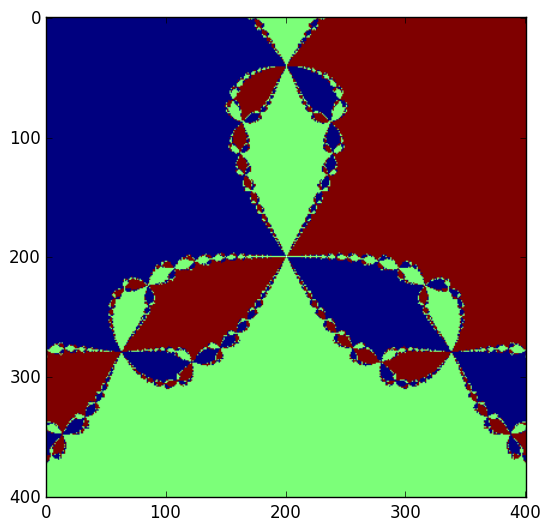

PyObject <matplotlib.image.AxesImage object at 0x7fbe48edf490>

In [9]:


g(z) = z^3 -1
#newtonraphson2(g,im)
#imshow tiene como argumento una matriz, y por cada elemento de la matriz igual a otro elemento  
imshow(imag(fractal2(g,400,1)))

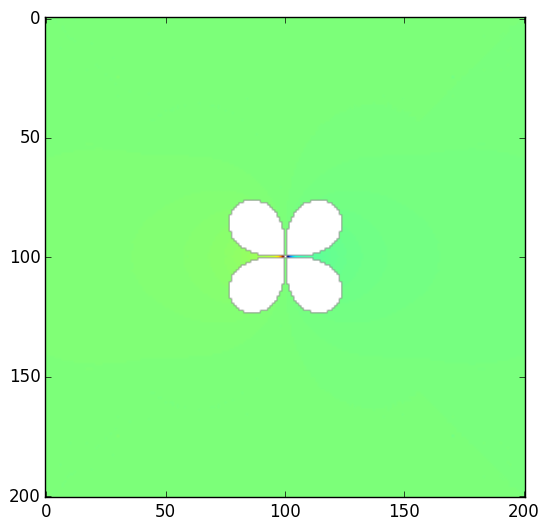

PyObject <matplotlib.image.AxesImage object at 0x7fbae27f1250>

In [14]:
h(z) = sin(z^2 - 1)
imshow(imag(fractal2(h,200,0.1)))

### Materiales de ayuda

[Módulos en Julia](http://julia.readthedocs.org/en/latest/manual/modules/)

##Fuentes

[Apuntes de la clase](https://github.com/lbenet/2016-1_TemasSelectosFisComp/blob/master/2-IntrodJulia-3.ipynb)

[Método de Newton](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton)

[Fractales](http://www.fractfinder.es/laboratorio/funciones.php#julia)